## Sommes de Darboux pour $y=x^2$ sur l'intervalle $[0,1]$

Inférieure             | Supérieure
:-------------------------:|:-------------------------:
![](data/Riemann_Integration_and_Darboux_Lower_Sums.gif)  |  ![](data/Riemann_Integration_and_Darboux_Lower_Sums.gif)


[source Wikipédia](https://fr.wikipedia.org/wiki/Int%C3%A9grale_de_Darboux#:~:text=Plus%20concr%C3%A8tement%2C%20pour%20une%20subdivision,sous%2Dintervalle%20de%20la%20subdivision.)

## Calcul formule de quadrature aux noeuds 1/3 et 2/3 

In [1]:
import numpy as np
noeuds = [1/3,2/3]
s = len(noeuds)

V = np.zeros((s,s))

qs = np.zeros(s)
for ordre in range(s):
    for index, noeud in enumerate(noeuds):
        V[ordre, index] = noeud**ordre 
    qs[ordre] = 1/(ordre+1)

print('V=\n',V)
print('\nqs=\n', qs)

poids = np.linalg.inv(V) @ qs

print("\npoids=\n",poids)

V=
 [[1.         1.        ]
 [0.33333333 0.66666667]]

qs=
 [1.  0.5]

poids=
 [0.5 0.5]


- > La formule de quadrature aux noeuds $\frac{1}{3}$ et $\frac{2}{3}$ est donc  :
$$
I\simeq \frac{1}{2}\left[f\left(\frac{1}{3}\right) + f\left(\frac{2}{3}\right)\right]
$$

# Systèmes dynamiques

![](data/animated-lorenz-attractor.gif)
[source](https://geoffboeing.com/2016/12/animating-lorenz-attractor-python/)

## Méthodes numériques

[Sources méthodes numériques](https://femto-physique.fr/analyse-numerique/runge-kutta.php)

## résolution brute ..

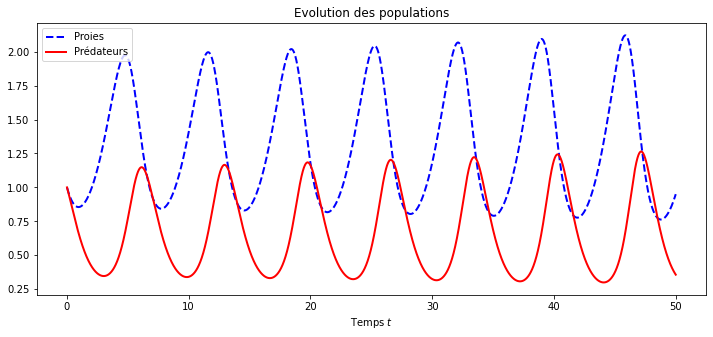

In [29]:
x0, y0 = 1, 1
dt = 0.01

a, b, c = 2/3, 4/3, 1
def trend(t,X):
    x, y = X
    dt_x = a*x - c*x*y
    dt_y = -b*y + c*x*y
    dt_X = np.array([dt_x, dt_y])
    return dt_X

X = np.array([x0,y0])
hist_X = [X]

t=0
tf = 50
hist_t = [t]

while t <= tf:
    X = X + dt*trend(t,X) # euler explicite
    t += dt
    
    hist_X.append(X)
    hist_t.append(t)

hist_X = np.array(hist_X)

# figure :
plt.figure(figsize=(12,5))
plt.title("Evolution des populations")
plt.plot(hist_t, hist_X[:,0],c='b',label='Proies',linewidth=2,linestyle='--');
plt.plot(hist_t, hist_X[:,1],c='r',label='Prédateurs',linewidth=2);
plt.xlabel(r'Temps $t$'); plt.legend();

## Avec une classe model générique ...

In [3]:
import matplotlib.pyplot as plt
import numpy as np

class Model:
    def __init__(self, trend_parameters = None, scheme_name ='explicit_euler'):
        self.trend_parameters = trend_parameters
        self.trend = self._make_trend()
        self.scheme_name = scheme_name
        self.available_schemes = ['explicit_euler','RK2','RK4']
        self.scheme = self._make_scheme()
    
    def _make_trend(self):
        return None
    
    def _make_scheme(self):
        if not self.scheme_name in self.available_schemes :
            raise ValueError(f"Le schéma temporel '{self.scheme_name}' n'est pas disponible.\nListe des schémas disponibles: {self.available_schemes}")
        
        def explicit_euler(f,x,t,dt):
            return x + dt*f(t,x)
            
        def RK2(f,x,t,dt):
            k1 = f(t,x)
            k2 = f(t+dt,x+dt*k1)
            return x + dt*(k1/2 + k2/2)
        
        def RK4(f,x,t,dt):
            k1 = f(t,x)
            k2 = f(t+dt/2, x+dt/2*k1)
            k3 = f(t+dt/2, x+dt/2*k2)
            k4 = f(t+dt, x+dt*k3)
            return x + dt/6 *(k1+2*k2+2*k3+k4)
            
            
        if self.scheme_name == 'explicit_euler': return explicit_euler
        elif self.scheme_name == 'RK2': return RK2
        else : return RK4
            
    def time_window(self, t_end, dt, t0=0,sub_div_saved_times=1):
        times = list(np.arange(t0, t_end,dt))
        if not t_end in times : times += [t_end]
        saved_times  = times[::sub_div_saved_times]
        if not t_end in saved_times : saved_times += [t_end]
        return times, saved_times

    def forecast(self, x0, times, saved_times = None):
        saved_times = times if saved_times is None else saved_times
        trajectory = {times[0]:x0}
        x = x0
        for prev_time, time in zip(times[:-1],times[1:]):
            dt = time - prev_time
            x = self.scheme(self.trend, x, time, dt)
            
            if time in saved_times: trajectory[time] = x
        
        return trajectory

## Lotka-Volterra

In [4]:
class LotkaVolterra(Model):
    def __init__(self, trend_parameters={"a":0.66,'b':1.33,"c":1},scheme_name ='explicit_euler'):
        super().__init__(trend_parameters, scheme_name)
        self.trend = self._make_trend()
    
    def _make_trend(self):
        def trend(t,X):
            x, y = X
            dt_x =  self.trend_parameters['a']*x - self.trend_parameters['c']*x*y
            dt_y = -self.trend_parameters['b']*y + self.trend_parameters['c']*x*y
            dt_X = np.array([dt_x, dt_y])
            return dt_X
        return trend
    
    def plot_traj(self,traj):
        tmax = np.max(np.array(list(traj.keys())))
        hist_X = np.array(list(traj.values()))
        plt.figure(figsize=(10,5))
        tmax
        plt.title(f"Evolution des populations sur {tmax} ans")
        plt.plot(saved_times, hist_X[:,0],c='b',linestyle='--',label='Proie')
        plt.plot(saved_times, hist_X[:,1],c='r',linewidth=2,label='Prédateur');
        plt.xlabel(r"$t$")
        plt.legend();
        

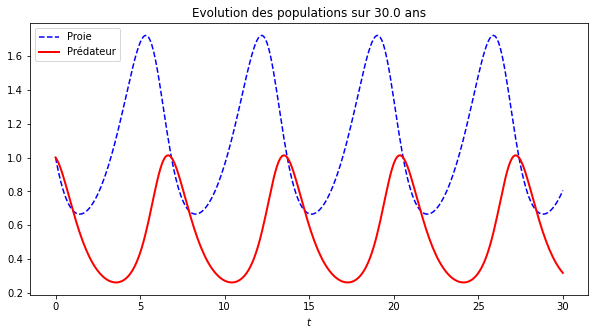

In [5]:
trend_parameters={"a":2/3,'b':4/3,"c":1.2}
lv = LotkaVolterra(trend_parameters=trend_parameters, scheme_name='RK4')

x0 = np.array([1,1])
times, saved_times = lv.time_window(30, 0.1)
traj = lv.forecast(x0, times, saved_times=saved_times)

lv.plot_traj(traj)

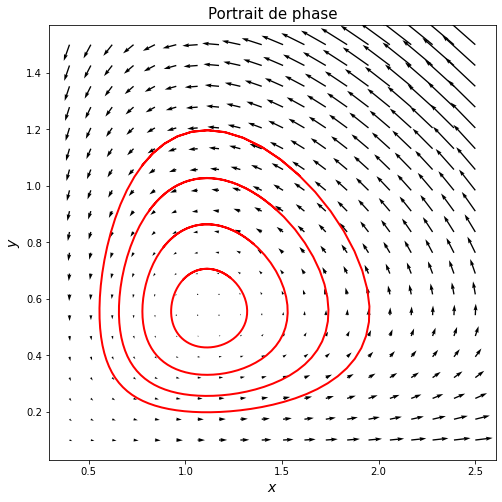

In [8]:
fix_pt = np.array([trend_parameters['b']/trend_parameters['c'], trend_parameters['a']/trend_parameters['c']])

direction = np.array([1.,1.])
step = 0.12

times, saved_times = lv.time_window(8, 0.1)

n_orbits = 4
plt.figure(figsize=(8,8))
plt.title("Portrait de phase",fontsize=15)
for i in range(1,n_orbits+1):
    traj = lv.forecast(fix_pt +i*step, times, saved_times=saved_times)
    hist_X = np.array(list(traj.values()))
    plt.plot(hist_X[:,0],hist_X[:,1], c='r',linewidth=2)

plt.xlabel(r"$x$", fontsize=14) ; plt.ylabel(r"$y$", fontsize=14);

n = 20
X,Y = np.meshgrid(np.linspace(0.4,2.5,n), np.linspace(0.1,1.5,n))

Z = lv.trend(0,[X,Y])

plt.quiver(X, Y, Z[0],Z[1]);

## Lorentz

[Source code](https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation)

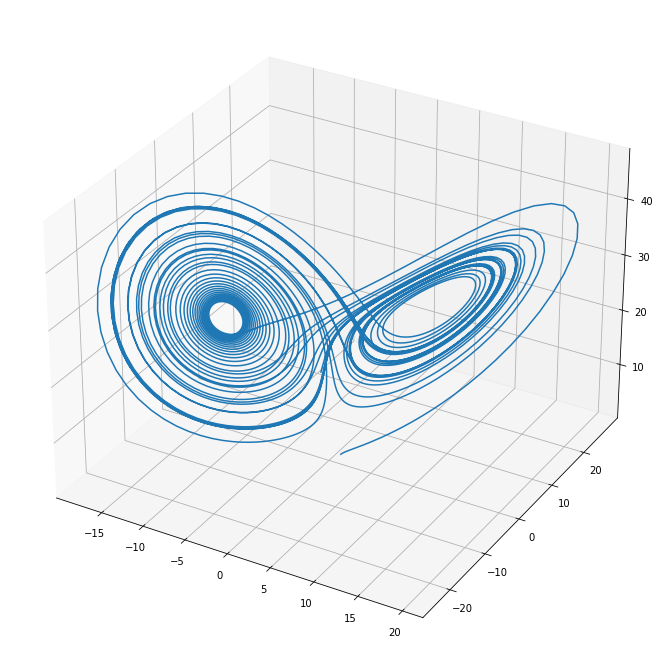

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()